# CYBER THREAT ANALYSIS OF STATE SPONSORED CYBER OPERATION: 2005-2022
# The data was collected from [Kaggle](https://www.kaggle.com/code/justin2028/state-sponsored-cyber-operations-code-starter). Some exploratory data cleaning was done on the data to make the data better for analysis and creation of insights. The updated data is hosted on my [Github](https://github.com/GeoSegun/Data-Analysis-of-Sponsored-Cyber-Operation-from-2005---Present-2022-). Ultimately, the primary data source was the Council on Foreign Relations, an independent and nonpartisian American think tank spcializing in U.S foreign policy and international relations.

IMPORTING LIBRARIES 

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Scraping data from github
url = 'https://raw.githubusercontent.com/GeoSegun/Data-Analysis-of-Sponsored-Cyber-Operation-from-2005---Present-2022-/master/cyber-operations-incidents.csv'

#Saving the data into a table "df"
df= pd.read_csv(url)

In [3]:
df.head()

,Title,Date,Affiliations,Description,Response,Victims,Sponsor,Type,Category,Sources_1,Sources_2,Sources_3
0,Targeting of dissidents and opposition politic...,1/20/2022,Believed to be the work of Ghana's government,The Israeli spyware firm NSO Group sold Pegasu...,Denial https://www.haaretz.com/israel-news/t...,Political dissidents and opposition leaders in...,Ghana,Espionage,Civil society,https://www.haaretz.com/israel-news/tech-news/...,NaN,NaN
1,Targeting of Ukrainian state entities,03/07/2022,UNC1151,The Belarusian threat actor UNC1151 targeted m...,NaN,Ukrainian state entities,Belarus,Espionage,Government,https://cert.gov.ua/article/37626,NaN,NaN
2,Targeting of Russian and Belarusian websites,05/04/2022,Ukrainian IT Army,Ukraine?? IT Army compromised Docker Engine ho...,NaN,"Russian and Belarusian websites were targeted,...",Ukraine,Denial of service,Government,https://www.crowdstrike.com/blog/compromised-d...,NaN,NaN
3,Targeting of the Belgian Federal Public Servic...,7/18/2022,Zirconium,Chinese threat actors targeted the Belgian Fed...,Denouncement https://diplomatie.belgium.be/e...,Belgian Federal Public Service Interior,China,Espionage,Government,https://diplomatie.belgium.be/en/news/declarat...,https://www.bleepingcomputer.com/news/security...,NaN
4,Targeting of Ukrainian government agencies,08/11/2022,Gamaredon,The Computer Emergency Response Team of Ukrain...,Confirmation,Ukrainian government agencies,Russian Federation,Espionage,Government,https://cert.gov.ua/article/2681855,NaN,NaN


In [4]:
# checking for empty cells in the data
df.isna().sum()

Title             0
Date             15
Affiliations    147
Description       0
Response        582
Victims          29
Sponsor          40
Type             37
Category         25
Sources_1         5
Sources_2       280
Sources_3       578
dtype: int64

In [5]:
# replace NaN values in "Affiliations" column with "Unknown"
df['Affiliations'].fillna("Unknown", inplace=True)

# drop rows with NaN values in "Victims", "Date", "Sponsor", "Category" and "Type" columns
df.dropna(subset=["Category", "Sponsor", "Victims", "Type", "Date", "Sources_1"], inplace=True)


In [6]:
#checking for empty cells again
df.isna().sum()

Title             0
Date              0
Affiliations      0
Description       0
Response        481
Victims           0
Sponsor           0
Type              0
Category          0
Sources_1         0
Sources_2       237
Sources_3       489
dtype: int64

In [7]:
# Extract the year from the date column
df['year'] = pd.to_datetime(df['Date'], format='%m/%d/%Y').dt.year

In [8]:
df['year'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2009, 2008, 2007, 2006, 2005])

In [22]:
df.head(5)

,Title,Date,Affiliations,Description,Response,Victims,Sponsor,Type,Category,Sources_1,Sources_2,Sources_3,year,Year,Region,Topic
0,Targeting of dissidents and opposition politic...,1/20/2022,Believed to be the work of Ghana's government,the israeli spyware firm nso group sold pegasu...,Denial https://www.haaretz.com/israel-news/t...,Political dissidents and opposition leaders in...,Ghana,Espionage,Civil society,https://www.haaretz.com/israel-news/tech-news/...,NaN,NaN,2022,2022,Africa,4
1,Targeting of Ukrainian state entities,03/07/2022,UNC1151,the belarusian threat actor unc targeted multi...,NaN,Ukrainian state entities,Belarus,Espionage,Government,https://cert.gov.ua/article/37626,NaN,NaN,2022,2022,Europe,2
2,Targeting of Russian and Belarusian websites,05/04/2022,Ukrainian IT Army,ukraine it army compromised docker engine hone...,NaN,"Russian and Belarusian websites were targeted,...",Ukraine,Denial of service,Government,https://www.crowdstrike.com/blog/compromised-d...,NaN,NaN,2022,2022,Europe,0
3,Targeting of the Belgian Federal Public Servic...,7/18/2022,Zirconium,chinese threat actors targeted the belgian fed...,Denouncement https://diplomatie.belgium.be/e...,Belgian Federal Public Service Interior,China,Espionage,Government,https://diplomatie.belgium.be/en/news/declarat...,https://www.bleepingcomputer.com/news/security...,NaN,2022,2022,East Asia,3
4,Targeting of Ukrainian government agencies,08/11/2022,Gamaredon,the computer emergency response team of ukrain...,Confirmation,Ukrainian government agencies,Russian Federation,Espionage,Government,https://cert.gov.ua/article/2681855,NaN,NaN,2022,2022,Europe,2


In [10]:
# Extract the year from the date column
df['Year'] = pd.to_datetime(df['Date'], format='%m/%d/%Y').dt.year

# Group the data by year and count the number of incidents
yearly_counts = df.groupby('Year')['Sources_1'].count().reset_index(name='Count')

# Plot the data using Plotly Express
fig = px.line(yearly_counts, x='Year', y='Count', title='Frequency of Cyber Operations Incidents Over Time')
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Number of Incidents')
fig.show()

In [11]:
# Count the number of incidents by category
category_counts = df['Category'].value_counts().reset_index(name='Count')

# Create a dictionary of category types and their order
category_order = {
    'Civil society': 1,
    'Government': 2,
    'Private sector': 3,
    'Military': 4
}

# Add a column with the category type order
category_counts['Order'] = category_counts['index'].map(category_order)

# Sort the data by category type order
category_counts = category_counts.sort_values('Order')

# Plot the data using Plotly Express
fig = px.bar(category_counts, x='index', y='Count', text='Count',
             title='Most Common Targets of Cyber Operations Incidents')
fig.update_xaxes(title_text='Target Category')
fig.update_yaxes(title_text='Number of Incidents')
fig.update_traces(textposition='outside')
fig.show()

Based on the resulting plot, we can see that the government is still the most common target of cyber operations incidents, followed by the military and the private sector. Civil society accounts for a smaller number of incidents in the provided dataset. This underscores the importance of prioritizing cybersecurity measures and training for government and military organizations, as well as private sector companies.

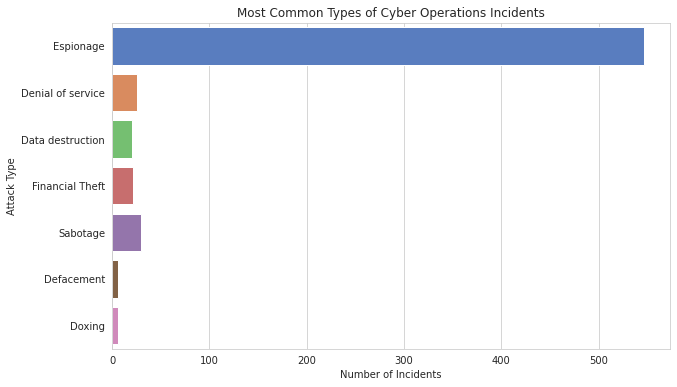

In [12]:
# Count the number of incidents by type
type_counts = df['Type'].value_counts().reset_index(name='Count')

# Create a dictionary of type and their order
type_order = {
    'Espionage': 1,
    'Denial of service': 2,
    'Data destruction': 3,
    'Financial Theft': 4,
    'Sabotage': 5,
    'Defacement': 6,
    'Doxing': 7
}

# Add a column with the type order
type_counts['Order'] = type_counts['index'].map(type_order)

# Sort the data by type order
type_counts = type_counts.sort_values('Order')

# Set up the plot
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

# Plot the data using Seaborn
sns.barplot(data=type_counts, y='index', x='Count', order=type_counts['index'], palette='muted')

# Add axis labels and a title
plt.xlabel('Number of Incidents')
plt.ylabel('Attack Type')
plt.title('Most Common Types of Cyber Operations Incidents')


plt.show()

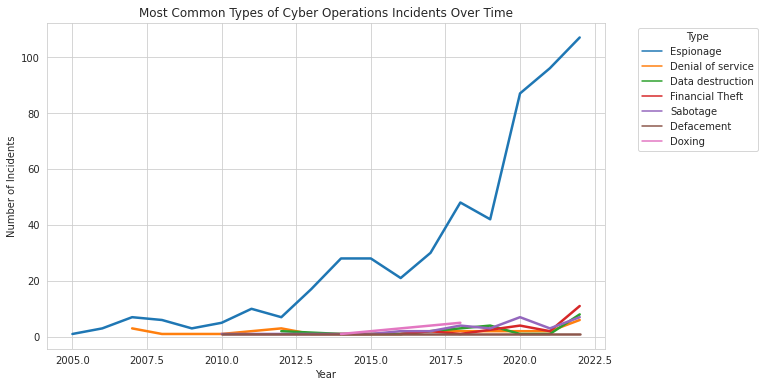

In [13]:
# Count the number of incidents by type and year
type_counts_date = df.groupby(['Type', 'Year']).size().reset_index(name='Count')

# Add a column with the type order
type_counts_date['Order'] = type_counts_date['Type'].map(type_order)

# Sort the data by type order and year
type_counts_date = type_counts_date.sort_values(['Order', 'Year'])

# Set up the plot
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

# Plot the data using Seaborn
sns.lineplot(data=type_counts_date, x='Year', y='Count', hue='Type', linewidth=2.5)

# Add a legend and axis labels
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Most Common Types of Cyber Operations Incidents Over Time')

plt.show()

The plot shows the trends in the number of cyber operations incidents over time by type. It reveals that the most common types of incidents are espionage and theft, followed by disruption and defacement. The number of incidents of espionage and theft has been consistently higher than other types, indicating that these types are more prevalent and perhaps easier to carry out. The number of incidents of disruption and defacement has also increased over time, possibly due to the growing importance of technology and dependence on digital infrastructure in various sectors. The plot also shows a significant increase in cyber operations incidents starting around 2014, which corresponds to the surge in internet usage and widespread adoption of digital technologies in various sectors. Overall, the plot provides valuable insights into the types of cyber operations incidents that are most common and how they have evolved over time.

In [14]:
df["Sponsor"].unique()

array(['Ghana', 'Belarus', 'Ukraine', 'China', 'Russian Federation',
       'Iran', 'Korea ', 'Canada', 'Israel', 'Jordan', 'Palestine',
       'Vietnam', 'United States of America', 'Spain', 'Thailand',
       'Pakistan', 'India', 'Bahrain', 'Mexico', 'Myanmar',
       'United Arab Emirates', 'Japan', 'Philippines', 'South Sudan',
       'Saudi Arabia', 'Poland', 'Togo', 'Syrian', 'Australia', 'Turkey',
       'Egypt', 'Uzbekistan', 'Morocco', 'Hong Kong', 'Lebanon',
       'Netherlands', ' United Kingdom', 'Panama', 'Ethiopia',
       'Indonesia', 'Kazakhstan', 'Uganda', 'France', 'Taiwan'],
      dtype=object)

In [15]:
import folium
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="cyber-ops")

def get_location(country):
    location = geolocator.geocode(country)
    if location:
        return [location.latitude, location.longitude]
    else:
        return None

In [16]:

# Define the focus countries
focus_countries = ['Ghana', 'Belarus', 'Ukraine', 'China', 'Russian Federation', 'Iran', 'Korea ', 'Canada', 'Israel', 'Jordan', 'Palestine', 'Vietnam', 'United States of America', 'Spain', 'Thailand', 'Pakistan', 'India', 'Bahrain', 'Mexico', 'Myanmar', 'United Arab Emirates', 'Japan', 'Philippines', 'South Sudan', 'Saudi Arabia', 'Poland', 'Togo', 'Syrian', 'Australia', 'Turkey', 'Egypt', 'Uzbekistan', 'Morocco', 'Hong Kong', 'Lebanon', 'Netherlands', ' United Kingdom', 'Panama', 'Ethiopia', 'Indonesia', 'Kazakhstan', 'Uganda', 'France', 'Taiwan']

# Create a map centered on the world
map = folium.Map(location=[30, 0], zoom_start=2)

# Get the count of incidents for each country
country_counts = df[df['Sponsor'].isin(focus_countries)]['Sponsor'].value_counts()

# Add a marker for each country with the incident count as a tooltip
geolocator = Nominatim(user_agent="cyber-ops")

for country in focus_countries:
    count = country_counts.loc[country]
    tooltip = f"{country}: {count} incidents"
    location = geolocator.geocode(country)
    if location:
        marker = folium.Marker(location=[location.latitude, location.longitude], tooltip=tooltip)
        marker.add_to(map)

# Display the map
map


The map genrated shows the distribution of Cyber Operations incidents sponsored by various countries. From the map it is seen that most of the operation is coming from Europe and Eastern Asia. 

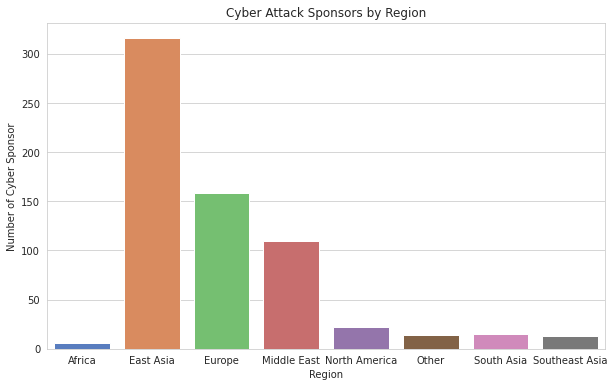

In [17]:
# Create a dictionary of region names and the corresponding countries
region_dict = {
    'North America': ['United States of America', 'Canada', 'Mexico'],
    'Europe': ['Belarus', 'Ukraine', 'Russian Federation', 'Spain', 'Poland', 'Netherlands', 'United Kingdom', 'France'],
    'East Asia': ['China', 'Korea ', 'Japan', 'Philippines', 'Hong Kong', 'Taiwan'],
    'Middle East': ['Iran', 'Israel', 'Jordan', 'Palestine', 'Bahrain', 'Saudi Arabia', 'Syrian', 'Lebanon', 'Turkey'],
    'South Asia': ['India', 'Pakistan'],
    'Southeast Asia': ['Vietnam', 'Thailand', 'Myanmar', 'Indonesia'],
    'Africa': ['Ghana', 'Togo', 'South Sudan', 'Uganda', 'Ethiopia', 'Morocco']
}

# Define a function to assign the region based on the country
def assign_region(country):
    for region, countries in region_dict.items():
        if country in countries:
            return region
    return 'Other'

# Apply the function to create a new column "Region" in the dataframe
df['Region'] = df['Sponsor'].apply(assign_region)

# Group the data by region and count the number of incidents
region_counts = df.groupby('Region').size().reset_index(name='Count')

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a bar chart using seaborn
sns.set_style('whitegrid')

sns.barplot(data=region_counts, x='Region', y='Count', palette= 'muted')

# Set the chart title and axis labels
plt.title('Cyber Attack Sponsors by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cyber Sponsor')

# Show the chart
plt.show()

In [18]:
country_counts.head()

China                       241
Russian Federation          145
Iran                         88
Korea                        71
United States of America     18
Name: Sponsor, dtype: int64

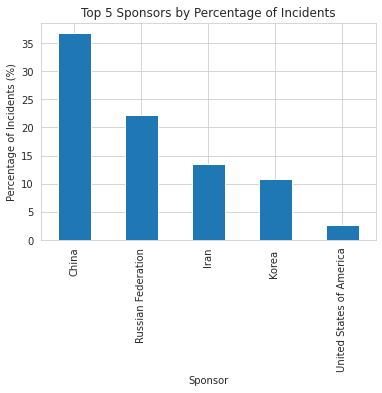

In [19]:
# Get the count of incidents for each sponsor
sponsor_counts = df['Sponsor'].value_counts()

# Get the total number of incidents
total_incidents = sponsor_counts.sum()

# Get the percentage of incidents for each sponsor and sort in descending order
sponsor_percents = ((sponsor_counts / total_incidents) *100).sort_values(ascending=False)

# Plot a bar chart of the top 5 sponsors
top_sponsors = sponsor_percents[:5]
top_sponsors.plot(kind='bar')
plt.xlabel('Sponsor')
plt.ylabel('Percentage of Incidents (%)')
plt.title('Top 5 Sponsors by Percentage of Incidents')
plt.show()

IMPORTING DEPENDECIES FOR MACHINE LEARNING

In [20]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
from itertools import product
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans

Top words for topic #0:
['data', 'department', 'incident', 'government', 'networks', 'actors', 'russian', 'compromised', 'actor', 'threat']


Top words for topic #1:
['information', 'chinese', 'purposes', 'organizations', 'companies', 'government', 'targets', 'espionage', 'actor', 'threat']


Top words for topic #2:
['documents', 'spear', 'group', 'used', 'campaign', 'malware', 'government', 'emails', 'hackers', 'phishing']


Top words for topic #3:
['united', 'malware', 'used', 'systems', 'hackers', 'russian', 'chinese', 'actor', 'targeted', 'threat']


Top words for topic #4:
['china', 'spyware', 'group', 'targeted', 'government', 'apt', 'actor', 'threat', 'malware', 'used']




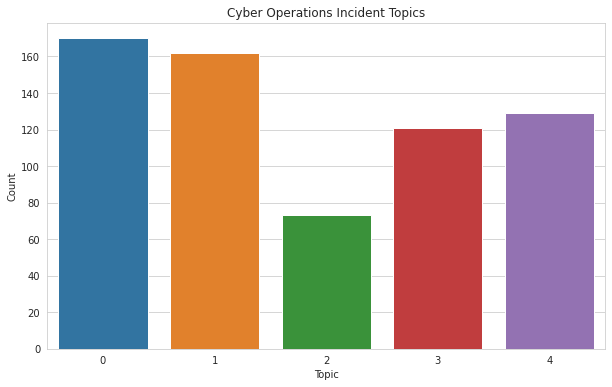

In [21]:
def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    text = ' '.join(text)
    return text

df['Description'] = df['Description'].apply(clean_text)

# Create a document-term matrix
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = cv.fit_transform(df['Description'])

# Perform LDA
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(doc_term_matrix)

# Print the top words for each topic
for i, topic in enumerate(lda_model.components_):
    print(f"Top words for topic #{i}:")
    print([list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(index)] for index in topic.argsort()[-10:]])
    print("\n")

# Visualize the topics
topics = lda_model.transform(doc_term_matrix)
df['Topic'] = topics.argmax(axis=1)
plt.figure(figsize=(10, 6))
sns.countplot(x='Topic', data=df)
plt.title('Cyber Operations Incident Topics')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()